In [11]:
!pip install wordcloud seaborn matplotlib

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [13]:
df = pd.read_csv("dataset_final.csv")
df.head()

,text_clean,target
0,communal violence in bhainsa telangana stones ...,1
1,telangana section has been imposed in bhainsa ...,1
2,arsonist sets cars ablaze at dealership,1
3,arsonist sets cars ablaze at dealership,1
4,lord jesus your love brings freedom and pardon...,0


In [14]:
print("Jumlah baris dataset:", len(df))
print("\nInfo dataset:")
print(df.info())

print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())

Jumlah baris dataset: 11390

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11390 entries, 0 to 11389
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_clean  11384 non-null  object
 1   target      11390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 178.1+ KB
None

Jumlah missing value tiap kolom:
text_clean    6
target        0
dtype: int64


/tmp/ipython-input-1647225359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="viridis")


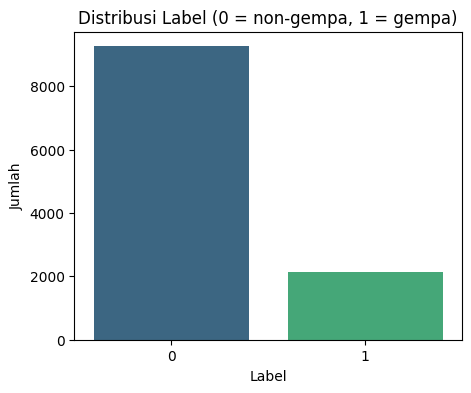

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"], palette="viridis")
plt.title("Distribusi Label (0 = non-gempa, 1 = gempa)")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

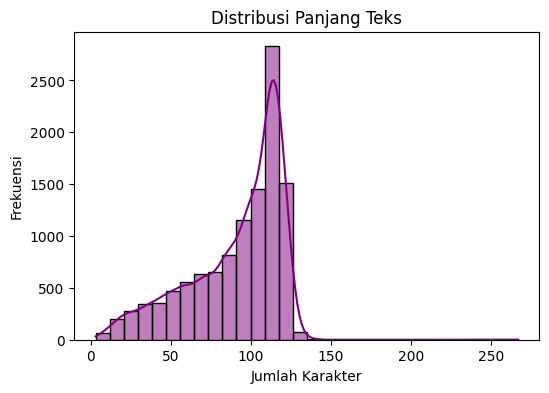

In [16]:
df["text_len"] = df["text_clean"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df["text_len"], bins=30, kde=True, color="purple")
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()

In [17]:
all_text = " ".join(df["text_clean"].astype(str))
words = all_text.split()

word_counts = Counter(words)
top_words = word_counts.most_common(20)

top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
top_words_df

,word,count
0,the,7661
1,to,4337
2,a,4285
3,of,3615
4,in,3411
5,and,3163
6,i,2872
7,is,2321
8,s,2057
9,for,1699


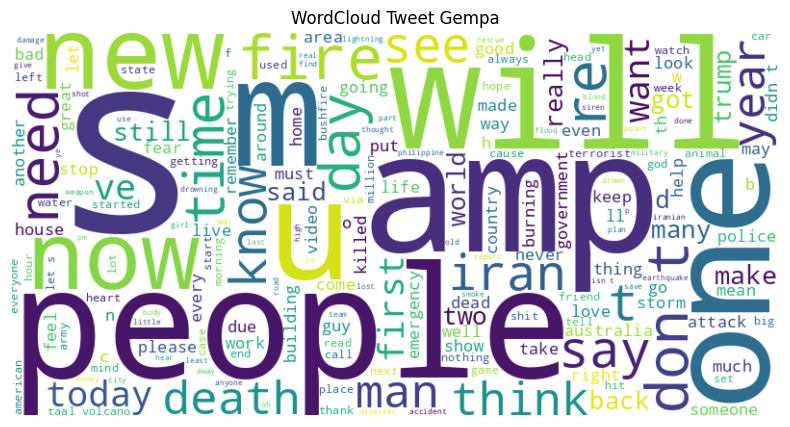

In [18]:
wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Tweet Gempa")
plt.show()